In [2]:
!nvidia-smi

Thu Jun 20 09:51:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.171.04             Driver Version: 535.171.04   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650        Off | 00000000:01:00.0 Off |                  N/A |
| N/A   54C    P0              14W /  50W |      8MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install highlight_text

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install noise
from noise import pnoise2

Defaulting to user installation because normal site-packages is not writeable


typing.Union[int, str, torch.device, NoneType]

In [3]:
import numpy as np
import torch
import pandas as pd
import random

from os import listdir, mkdir, rename
from os.path import join, exists
import shutil
import datetime

import matplotlib.pyplot as plt
from highlight_text import ax_text, fig_text
from PIL import Image

import warnings

warnings.filterwarnings('ignore')

In [9]:
print(torch.cuda.is_available())

True


In [22]:
ls

 archive/  'archive(1).zip'   main.ipynb


In [9]:
ls archive

EuroSAT/  EuroSATallBands/


In [10]:
classes = listdir(path = './archive/EuroSAT')

In [11]:
classes

['Pasture',
 'Industrial',
 'Residential',
 'SeaLake',
 'AnnualCrop',
 'River',
 'Highway',
 'Forest',
 'all_inputs',
 'validation.csv',
 'label_map.json',
 'test.csv',
 'HerbaceousVegetation',
 'PermanentCrop',
 'train.csv',
 'all_targets']

In [12]:
path_target = './archive/EuroSAT/all_targets'
path_input = './archive/EuroSAT/all_inputs'

In [36]:

# """RUN IT ONLY ONCE TO RENAME THE FILES IN THE UNPACKED ARCHIVE"""
# mkdir(path_input)
# mkdir(path_target)
# k = 1
# for kind in classes:
#   path = join('./archive/EuroSAT', str(kind))
#   for i, f in enumerate(listdir(path)):
#     shutil.copyfile(join(path, f),
#                   join(path_target, f))
#     rename(join(path_target, f), join(path_target, f'{k}.jpg'))
    # k += 1

In [12]:
def generate_perlin_noise(width, height, scale, octaves, persistence, lacunarity):
    noise = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            noise[i][j] = pnoise2(i / scale,
                                  j / scale,
                                  octaves=octaves,
                                  persistence=persistence,
                                  lacunarity=lacunarity,
                                  repeatx=width,
                                  repeaty=height,
                                  base=0)
    return noise

def normalize_noise(noise):
    min_val = noise.min()
    max_val = noise.max()
    return (noise - min_val) / (max_val - min_val)

def generate_clouds(width, height, base_scale, octaves, persistence, lacunarity):
    clouds = np.zeros((height, width))
    for octave in range(1, octaves + 1):
        scale = base_scale / octave
        layer = generate_perlin_noise(width, height, scale, 1, persistence, lacunarity)
        clouds += layer * (persistence ** octave)

    clouds = normalize_noise(clouds)
    return clouds

def overlay_clouds(image, clouds, alpha=0.5):

    clouds_rgb = np.stack([clouds] * 3, axis=-1)

    image = image.astype(float) / 255.0
    clouds_rgb = clouds_rgb.astype(float)

    blended = image * (1 - alpha) + clouds_rgb * alpha

    blended = (blended * 255).astype(np.uint8)
    return blended

In [8]:
pwd

'/home/gajendra/Deep learning Projects/GAN'

In [41]:
width, height = 64, 64
octaves = 12 #number of noise layers combined
persistence = 0.5 #lower persistence reduces the amplitude of higher-frequency octaves
lacunarity = 2 #higher lacunarity increases the frequency of higher-frequency octaves
for i in range(len(listdir(path_target))):
  base_scale = random.uniform(5,120) #noise frequency
  alpha = random.uniform(0,1) #transparency

  clouds = generate_clouds(width, height, base_scale, octaves, persistence, lacunarity)

  img = np.asarray(Image.open(join(path_target, f'{i+1}.jpg')))
  image = Image.fromarray(overlay_clouds(img,clouds, alpha))
  image.save(join(path_input,f'{i+1}.jpg'))
  print(f'Processed {i+1}/{len(listdir(path_target))}')

Processed 1/21500
Processed 2/21500
Processed 3/21500
Processed 4/21500
Processed 5/21500
Processed 6/21500
Processed 7/21500
Processed 8/21500
Processed 9/21500
Processed 10/21500
Processed 11/21500
Processed 12/21500
Processed 13/21500
Processed 14/21500
Processed 15/21500
Processed 16/21500
Processed 17/21500
Processed 18/21500
Processed 19/21500
Processed 20/21500
Processed 21/21500
Processed 22/21500
Processed 23/21500
Processed 24/21500
Processed 25/21500
Processed 26/21500
Processed 27/21500
Processed 28/21500
Processed 29/21500
Processed 30/21500
Processed 31/21500
Processed 32/21500
Processed 33/21500
Processed 34/21500
Processed 35/21500
Processed 36/21500
Processed 37/21500
Processed 38/21500
Processed 39/21500
Processed 40/21500
Processed 41/21500
Processed 42/21500
Processed 43/21500
Processed 44/21500
Processed 45/21500
Processed 46/21500
Processed 47/21500
Processed 48/21500
Processed 49/21500
Processed 50/21500
Processed 51/21500
Processed 52/21500
Processed 53/21500
Pr

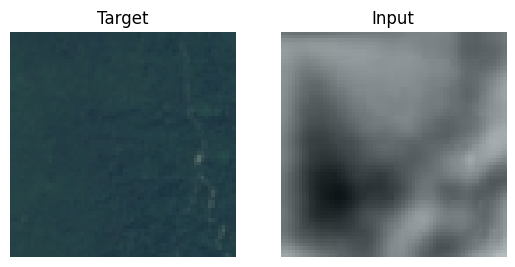

In [13]:
idx = np.random.randint(27000)
fig,ax = plt.subplots(1,2)
ax[0].imshow(np.asarray(Image.open(join(path_target, f'{idx}.jpg'))))
ax[1].imshow(np.asarray(Image.open(join(path_input, f'{idx}.jpg'))))
ax[0].set_title("Target")
ax[0].axis('off')
ax[1].set_title("Input")
ax[1].axis('off')
plt.show()

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torch.utils.data import Subset

In [15]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride = 1, downsample = None):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Sequential(
                        nn.Conv2d(in_channels, out_channels, kernel_size = 3, stride = stride, padding = 1),
                        nn.BatchNorm2d(out_channels),
                        nn.ReLU())
        self.conv2 = nn.Sequential(
                        nn.Conv2d(out_channels, out_channels, kernel_size = 3, stride = 1, padding = 1),
                        nn.BatchNorm2d(out_channels))
        self.downsample = downsample
        self.relu = nn.ReLU()
        self.out_channels = out_channels

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.conv2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block=ResidualBlock, all_connections=[3,4,6,3]):
        super(ResNet, self).__init__()
        self.inputs = 16
        self.conv1 = nn.Sequential(
                        nn.Conv2d(3, 16, kernel_size = 3, stride = 1, padding = 1),
                        nn.BatchNorm2d(16),
                        nn.ReLU()) #16x64x64
        self.maxpool = nn.MaxPool2d(kernel_size = 2, stride = 2) #16x32x32


        self.layer0 = self.makeLayer(block, 16, all_connections[0], stride = 1) #connections = 3, shape: 16x32x32
        self.layer1 = self.makeLayer(block, 32, all_connections[1], stride = 2)#connections = 4, shape: 32x16x16
        self.layer2 = self.makeLayer(block, 128, all_connections[2], stride = 2)#connections = 6, shape: 1281x8x8
        self.layer3 = self.makeLayer(block, 256, all_connections[3], stride = 2)#connections = 3, shape: 256x4x4
        self.avgpool = nn.AvgPool2d(4, stride=1)
        self.fc = nn.Linear(256, 1)

    def makeLayer(self, block, outputs, connections, stride=1):
        downsample = None
        if stride != 1 or self.inputs != outputs:
            downsample = nn.Sequential(
                nn.Conv2d(self.inputs, outputs, kernel_size=1, stride=stride),
                nn.BatchNorm2d(outputs),
            )
        layers = []
        layers.append(block(self.inputs, outputs, stride, downsample))
        self.inputs = outputs
        for i in range(1, connections):
            layers.append(block(self.inputs, outputs))

        return nn.Sequential(*layers)


    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool(x)
        x = self.layer0(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(-1, 256)
        x = self.fc(x).flatten()
        return F.sigmoid(x)

In [16]:
class ResNet(nn.Module):
    def __init__(self, block=ResidualBlock, all_connections=[3,4,6,3]):
        super(ResNet, self).__init__()
        self.inputs = 16
        self.conv1 = nn.Sequential(
                        nn.Conv2d(3, 16, kernel_size = 3, stride = 1, padding = 1),
                        nn.BatchNorm2d(16),
                        nn.ReLU()) #16x64x64
        self.maxpool = nn.MaxPool2d(kernel_size = 2, stride = 2) #16x32x32


        self.layer0 = self.makeLayer(block, 16, all_connections[0], stride = 1) #connections = 3, shape: 16x32x32
        self.layer1 = self.makeLayer(block, 32, all_connections[1], stride = 2)#connections = 4, shape: 32x16x16
        self.layer2 = self.makeLayer(block, 128, all_connections[2], stride = 2)#connections = 6, shape: 1281x8x8
        self.layer3 = self.makeLayer(block, 256, all_connections[3], stride = 2)#connections = 3, shape: 256x4x4
        self.avgpool = nn.AvgPool2d(4, stride=1)
        self.fc = nn.Linear(256, 1)

    def makeLayer(self, block, outputs, connections, stride=1):
        downsample = None
        if stride != 1 or self.inputs != outputs:
            downsample = nn.Sequential(
                nn.Conv2d(self.inputs, outputs, kernel_size=1, stride=stride),
                nn.BatchNorm2d(outputs),
            )
        layers = []
        layers.append(block(self.inputs, outputs, stride, downsample))
        self.inputs = outputs
        for i in range(1, connections):
            layers.append(block(self.inputs, outputs))

        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool(x)
        x = self.layer0(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(-1, 256)
        x = self.fc(x).flatten()
        return F.sigmoid(x)

## GENERATOR

In [17]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)

class UNet(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv_1 = DoubleConv(3, 32) # 32x64x64
      self.pool_1 = nn.MaxPool2d(kernel_size=2, stride=2) # 32x32x32

      self.conv_2 = DoubleConv(32, 64)  #64x32x32
      self.pool_2 = nn.MaxPool2d(kernel_size=2, stride=2) #64x16x16

      self.conv_3 = DoubleConv(64, 128)  #128x16x16
      self.pool_3 = nn.MaxPool2d(kernel_size=2, stride=2) #128x8x8

      self.conv_4 = DoubleConv(128, 256)  #256x8x8
      self.pool_4 = nn.MaxPool2d(kernel_size=2, stride=2) #256x4x4

      self.conv_5 = DoubleConv(256, 512)  #512x2x2

      #DECODER
      self.upconv_1 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2) #256x4x4
      self.conv_6 = DoubleConv(512, 256) #256x4x4


      self.upconv_2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2) #128x8x8
      self.conv_7 = DoubleConv(256, 128)  #128x8x8

      self.upconv_3 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2) #64x16x16
      self.conv_8 = DoubleConv(128, 64)  #64x16x16

      self.upconv_4 = nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2) #32x32x32
      self.conv_9 = DoubleConv(64, 32)  #32x32x32

      self.output = nn.Conv2d(32, 3, kernel_size = 3, stride = 1, padding = 1) #3x64x64

    def forward(self, batch):

      conv_1_out = self.conv_1(batch)
      conv_2_out = self.conv_2(self.pool_1(conv_1_out))
      conv_3_out = self.conv_3(self.pool_2(conv_2_out))
      conv_4_out = self.conv_4(self.pool_3(conv_3_out))
      conv_5_out = self.conv_5(self.pool_4(conv_4_out))

      conv_6_out = self.conv_6(torch.cat([self.upconv_1(conv_5_out), conv_4_out], dim=1))
      conv_7_out = self.conv_7(torch.cat([self.upconv_2(conv_6_out), conv_3_out], dim=1))
      conv_8_out = self.conv_8(torch.cat([self.upconv_3(conv_7_out), conv_2_out], dim=1))
      conv_9_out = self.conv_9(torch.cat([self.upconv_4(conv_8_out), conv_1_out], dim=1))

      output = self.output(conv_9_out)


      return F.sigmoid(output)

## Now we need to split our data into train/test and wrap them into a torch dataset:

In [18]:
class dataset(Dataset):
  def __init__(self, batch_size, images_paths, targets, img_size = 64):
    self.batch_size = batch_size
    self.img_size = img_size
    self.images_paths = images_paths
    self.targets = targets
    self.len = len(self.images_paths) // batch_size

    self.transform = transforms.Compose([
                transforms.ToTensor(),
                ])


    self.batch_im = [self.images_paths[idx * self.batch_size:(idx + 1) * self.batch_size] for idx in range(self.len)]
    self.batch_t = [self.targets[idx * self.batch_size:(idx + 1) * self.batch_size] for idx in range(self.len)]

  def __getitem__(self, idx):
      pred = torch.stack([
              self.transform(Image.open(join(path_input,file_name)))
              for file_name in self.batch_im[idx]
          ])
      target = torch.stack([
              self.transform(Image.open(join(path_target,file_name)))
              for file_name in self.batch_im[idx]
          ])
      return pred, target

  def __len__(self):
      return self.len

Perfect. It’s time to write the training loop. Before doing so, let’s define our loss functions and optimizer:

In [19]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = "cpu"

batch_size = 64
num_epochs = 15
learning_rate_D = 1e-5
learning_rate_G = 1e-4

discriminator = ResNet()
generator = UNet()

bce = nn.BCEWithLogitsLoss()
l1loss = nn.L1Loss()

optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate_D)
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate_G)

scheduler_D = optim.lr_scheduler.StepLR(optimizer_D, step_size=10, gamma=0.1)
scheduler_G = optim.lr_scheduler.StepLR(optimizer_G, step_size=10, gamma=0.1)

In [20]:
test_ratio, train_ratio = 0.3, 0.7
num_test = int(len(listdir(path_target))*test_ratio)
num_train = int((int(len(listdir(path_target)))-num_test))

img_size = (64, 64)

print("Number of train samples:", num_train)
print("Number of test samples:", num_test)

random.seed(231)
train_idxs = np.array(random.sample(range(num_test+num_train), num_train))
mask = np.ones(num_train+num_test, dtype=bool)
mask[train_idxs] = False

images = {}
features = random.sample(listdir(path_input),num_test+num_train)
targets = random.sample(listdir(path_target),num_test+num_train)

random.Random(231).shuffle(features)
random.Random(231).shuffle(targets)

train_input_img_paths = np.array(features)[train_idxs]
train_target_img_path = np.array(targets)[train_idxs]
test_input_img_paths = np.array(features)[mask]
test_target_img_path = np.array(targets)[mask]

train_loader = dataset(batch_size=batch_size, img_size=img_size, images_paths=train_input_img_paths, targets=train_target_img_path)
test_loader = dataset(batch_size=batch_size, img_size=img_size, images_paths=test_input_img_paths, targets=test_target_img_path)

Number of train samples: 15050
Number of test samples: 6450


Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generat

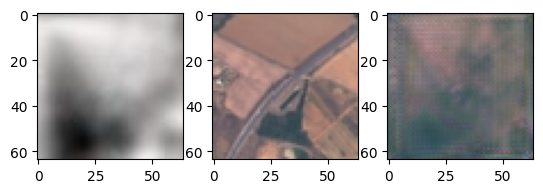

Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generat

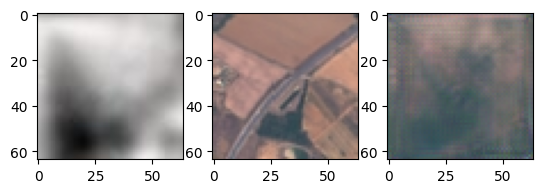

Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generat

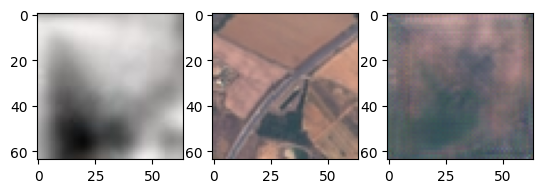

Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generat

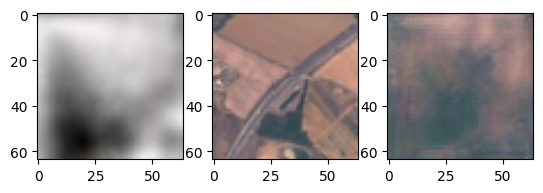

Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generat

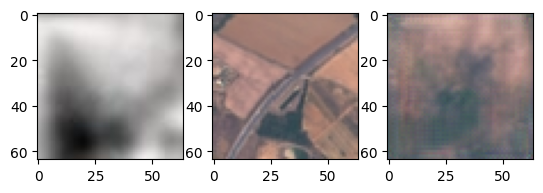

Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generat

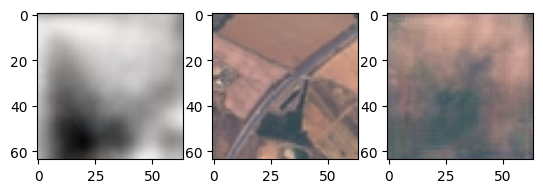

Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generat

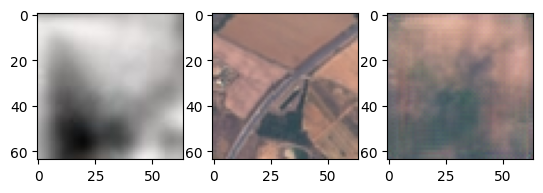

Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generat

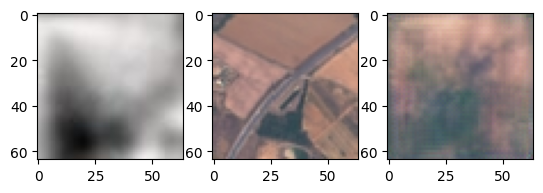

Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generat

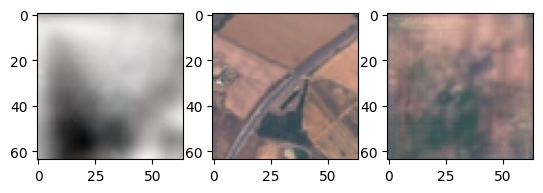

Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generat

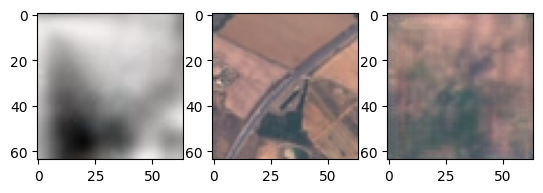

Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generat

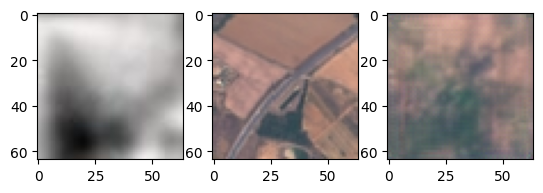

Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generat

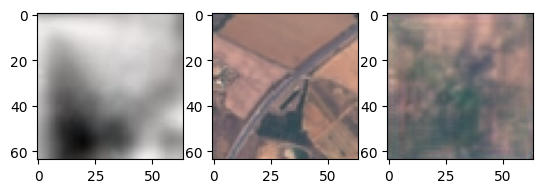

Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generat

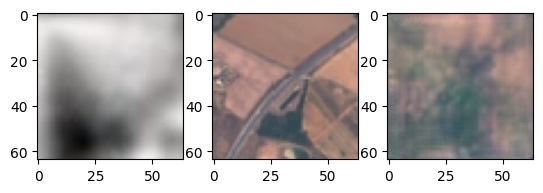

Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generat

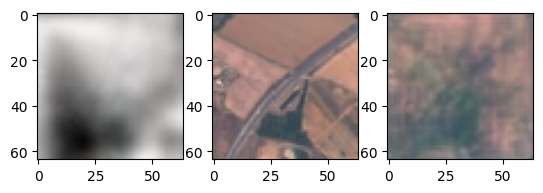

Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Generator fake device: cuda:0
Discriminator pred_fake device: cuda:0
Discriminator pred_real device: cuda:0
Generat

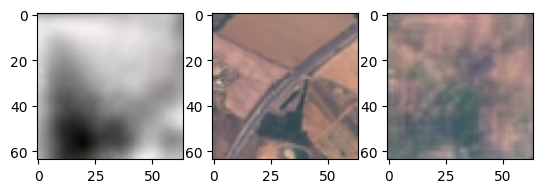

Training completed


In [22]:

import torch
import numpy as np
import matplotlib.pyplot as plt

train_loss_G, train_loss_D, val_loss_G, val_loss_D = [], [], [], []
all_loss_G, all_loss_D = [], []
best_generator_epoch_val_loss, best_discriminator_epoch_val_loss = -np.inf, -np.inf
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move models to the correct device
generator.to(device)
discriminator.to(device)

for epoch in range(num_epochs):

    discriminator.train()
    generator.train()

    discriminator_epoch_loss, generator_epoch_loss = 0, 0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        '''1. Training the Discriminator (ResNet)'''
        optimizer_D.zero_grad()


        fake = generator(inputs).detach()

        print(f"Generator fake device: {fake.device}")
       

        pred_fake = discriminator(fake)
        print(f"Discriminator pred_fake device: {pred_fake.device}")
        loss_fake = bce(pred_fake, torch.zeros_like(pred_fake, device=device))

        pred_real = discriminator(targets)
        print(f"Discriminator pred_real device: {pred_real.device}")
        loss_real = bce(pred_real, torch.ones_like(pred_real, device=device))

        loss_D = (loss_fake + loss_real) / 2

        loss_D.backward()
        optimizer_D.step()

        discriminator_epoch_loss += loss_D.item()
        all_loss_D.append(loss_D.item())

        '''2. Training the Generator (UNet)'''
        optimizer_G.zero_grad()

        fake = generator(inputs)
        print(f"Generator fake device: {fake.device}")
        pred_fake = discriminator(fake)
        print(f"Discriminator pred_fake device: {pred_fake.device}")

        loss_G_bce = bce(pred_fake, torch.ones_like(pred_fake, device=device))
        loss_G_l1 = l1loss(fake, targets) * 100
        loss_G = loss_G_bce + loss_G_l1
        loss_G.backward()
        optimizer_G.step()

        generator_epoch_loss += loss_G.item()
        all_loss_G.append(loss_G.item())

    discriminator_epoch_loss /= len(train_loader)
    generator_epoch_loss /= len(train_loader)
    train_loss_D.append(discriminator_epoch_loss)
    train_loss_G.append(generator_epoch_loss)

    discriminator.eval()
    generator.eval()

    discriminator_epoch_val_loss, generator_epoch_val_loss = 0, 0

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            fake = generator(inputs)
            print(f"Generator fake device: {fake.device}")
            pred = discriminator(fake)
            print(f"Discriminator pred device: {pred.device}")

            loss_G_bce = bce(fake, torch.ones_like(fake, device=device))
            loss_G_l1 = l1loss(fake, targets) * 100
            loss_G = loss_G_bce + loss_G_l1
            loss_D = bce(pred, torch.zeros_like(pred, device=device))

            discriminator_epoch_val_loss += loss_D.item()
            generator_epoch_val_loss += loss_G.item()

    discriminator_epoch_val_loss /= len(test_loader)
    generator_epoch_val_loss /= len(test_loader)

    val_loss_D.append(discriminator_epoch_val_loss)
    val_loss_G.append(generator_epoch_val_loss)

    print(f"------Epoch [{epoch + 1}/{num_epochs}]------")
    print(f"Train Loss D: {discriminator_epoch_loss:.4f}, Val Loss D: {discriminator_epoch_val_loss:.4f}")
    print(f"Train Loss G: {generator_epoch_loss:.4f}, Val Loss G: {generator_epoch_val_loss:.4f}")

    if discriminator_epoch_val_loss > best_discriminator_epoch_val_loss:
        best_discriminator_epoch_val_loss = discriminator_epoch_val_loss
        torch.save(discriminator.state_dict(), "discriminator.pth")
    if generator_epoch_val_loss > best_generator_epoch_val_loss:
        best_generator_epoch_val_loss = generator_epoch_val_loss
        torch.save(generator.state_dict(), "generator.pth")
    # scheduler_D.step()
    # scheduler_G.step()

    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(np.transpose(inputs.cpu().numpy()[7], (1, 2, 0)))
    ax[1].imshow(np.transpose(targets.cpu().numpy()[7], (1, 2, 0)))
    ax[2].imshow(np.transpose(fake.detach().cpu().numpy()[7], (1, 2, 0)))
    plt.show()
print("Training completed")


In [ ]:
Train Loss D: 0.6726, Val Loss D: 0.9370
Train Loss G: 7.3637, Val Loss G: 5.9561

Train Loss D: 0.6807, Val Loss D: 0.8170
Train Loss G: 3.9323, Val Loss G: 3.9229

In [39]:
# train_loss_G, train_loss_D, val_loss_G, val_loss_D = [], [], [], []
# all_loss_G, all_loss_D = [], []
# best_generator_epoch_val_loss, best_discriminator_epoch_val_loss = -np.inf, -np.inf
# for epoch in range(num_epochs):

#     discriminator.train()
#     generator.train()

#     discriminator_epoch_loss, generator_epoch_loss = 0, 0

#     for inputs, targets in train_loader:
#         inputs, true = inputs, targets

#         '''1. Training the Discriminator (ResNet)'''
#         optimizer_D.zero_grad()

#         fake = generator(inputs).detach()

#         pred_fake = discriminator(fake).to(device)
#         loss_fake = bce(pred_fake, torch.zeros(batch_size, device=device))

#         pred_real = discriminator(true).to(device)
#         loss_real = bce(pred_real, torch.ones(batch_size, device=device))

#         loss_D = (loss_fake+loss_real)/2

#         loss_D.backward()
#         optimizer_D.step()

#         discriminator_epoch_loss += loss_D.item()
#         all_loss_D.append(loss_D.item())

#         '''2. Training the Generator (UNet)'''
#         optimizer_G.zero_grad()

#         fake = generator(inputs)
#         pred_fake = discriminator(fake).to(device)
        
#         loss_G_bce = bce(pred_fake, torch.ones_like(pred_fake, device=device))
#         loss_G_l1 = l1loss(fake, targets)*100
#         loss_G = loss_G_bce + loss_G_l1
#         loss_G.backward()
#         optimizer_G.step()

#         generator_epoch_loss += loss_G.item()
#         all_loss_G.append(loss_G.item())

#     discriminator_epoch_loss /= len(train_loader)
#     generator_epoch_loss /= len(train_loader)
#     train_loss_D.append(discriminator_epoch_loss)
#     train_loss_G.append(generator_epoch_loss)

#     discriminator.eval()
#     generator.eval()

#     discriminator_epoch_val_loss, generator_epoch_val_loss = 0, 0

#     with torch.no_grad():
#         for inputs, targets in test_loader:
#             inputs, targets = inputs, targets

#             fake = generator(inputs)
#             pred = discriminator(fake).to(device)
            
#             loss_G_bce = bce(fake, torch.ones_like(fake, device=device))
#             loss_G_l1 = l1loss(fake, targets)*100
#             loss_G = loss_G_bce + loss_G_l1
#             loss_D = bce(pred.to(device), torch.zeros(batch_size, device=device))

#             discriminator_epoch_val_loss += loss_D.item()
#             generator_epoch_val_loss += loss_G.item()

#     discriminator_epoch_val_loss /= len(test_loader)
#     generator_epoch_val_loss /= len(test_loader)

#     val_loss_D.append(discriminator_epoch_val_loss)
#     val_loss_G.append(generator_epoch_val_loss)

#     print(f"------Epoch [{epoch+1}/{num_epochs}]------\nTrain Loss D: {discriminator_epoch_loss:.4f}, Val Loss D: {discriminator_epoch_val_loss:.4f}")
#     print(f'Train Loss G: {generator_epoch_loss:.4f}, Val Loss G: {generator_epoch_val_loss:.4f}')

#     if discriminator_epoch_val_loss > best_discriminator_epoch_val_loss:
#         discriminator_epoch_val_loss = best_discriminator_epoch_val_loss
#         torch.save(discriminator.state_dict(), "discriminator.pth")
#     if generator_epoch_val_loss > best_generator_epoch_val_loss:
#         generator_epoch_val_loss = best_generator_epoch_val_loss
#         torch.save(generator.state_dict(), "generator.pth")
#     #scheduler_D.step()
#     #scheduler_G.step()

#     fig, ax = plt.subplots(1,3)
#     ax[0].imshow(np.transpose(inputs.numpy()[7], (1,2,0)))
#     ax[1].imshow(np.transpose(targets.numpy()[7], (1,2,0)))
#     ax[2].imshow(np.transpose(fake.detach().numpy()[7], (1,2,0)))
#     plt.show()

In [37]:
# train_loss_G, train_loss_D, val_loss_G, val_loss_D = [], [], [], []
# all_loss_G, all_loss_D = [], []
# best_generator_epoch_val_loss, best_discriminator_epoch_val_loss = -np.inf, -np.inf
# for epoch in range(num_epochs):

#     discriminator.train()
#     generator.train()

#     discriminator_epoch_loss, generator_epoch_loss = 0, 0

#     for inputs, targets in train_loader:
#         inputs, true = inputs, targets

#         '''1. Training the Discriminator (ResNet)'''
#         optimizer_D.zero_grad()

#         fake = generator(inputs).detach()

#         pred_fake = discriminator(fake).to(device)
#         loss_fake = bce(pred_fake, torch.zeros(batch_size, device=device))

#         pred_real = discriminator(true).to(device)
#         loss_real = bce(pred_real, torch.ones(batch_size, device=device))

#         loss_D = (loss_fake+loss_real)/2

#         loss_D.backward()
#         optimizer_D.step()

#         discriminator_epoch_loss += loss_D.item()
#         all_loss_D.append(loss_D.item())

#         '''2. Training the Generator (UNet)'''
#         optimizer_G.zero_grad()

#         fake = generator(inputs)
#         pred_fake = discriminator(fake).to(device)
        
#         loss_G_bce = bce(pred_fake, torch.ones_like(pred_fake, device=device))
#         loss_G_l1 = l1loss(fake, targets)*100
#         loss_G = loss_G_bce + loss_G_l1
#         loss_G.backward()
#         optimizer_G.step()

#         generator_epoch_loss += loss_G.item()
#         all_loss_G.append(loss_G.item())

#     discriminator_epoch_loss /= len(train_loader)
#     generator_epoch_loss /= len(train_loader)
#     train_loss_D.append(discriminator_epoch_loss)
#     train_loss_G.append(generator_epoch_loss)

#     discriminator.eval()
#     generator.eval()

#     discriminator_epoch_val_loss, generator_epoch_val_loss = 0, 0

#     with torch.no_grad():
#         for inputs, targets in test_loader:
#             inputs, targets = inputs, targets

#             fake = generator(inputs)
#             pred = discriminator(fake).to(device)
            
#             loss_G_bce = bce(fake, torch.ones_like(fake, device=device))
#             loss_G_l1 = l1loss(fake, targets)*100
#             loss_G = loss_G_bce + loss_G_l1
#             loss_D = bce(pred.to(device), torch.zeros(batch_size, device=device))

#             discriminator_epoch_val_loss += loss_D.item()
#             generator_epoch_val_loss += loss_G.item()

#     discriminator_epoch_val_loss /= len(test_loader)
#     generator_epoch_val_loss /= len(test_loader)

#     val_loss_D.append(discriminator_epoch_val_loss)
#     val_loss_G.append(generator_epoch_val_loss)

#     print(f"------Epoch [{epoch+1}/{num_epochs}]------\nTrain Loss D: {discriminator_epoch_loss:.4f}, Val Loss D: {discriminator_epoch_val_loss:.4f}")
#     print(f'Train Loss G: {generator_epoch_loss:.4f}, Val Loss G: {generator_epoch_val_loss:.4f}')

#     if discriminator_epoch_val_loss > best_discriminator_epoch_val_loss:
#         discriminator_epoch_val_loss = best_discriminator_epoch_val_loss
#         torch.save(discriminator.state_dict(), "discriminator.pth")
#     if generator_epoch_val_loss > best_generator_epoch_val_loss:
#         generator_epoch_val_loss = best_generator_epoch_val_loss
#         torch.save(generator.state_dict(), "generator.pth")
#     #scheduler_D.step()
#     #scheduler_G.step()

#     fig, ax = plt.subplots(1,3)
#     ax[0].imshow(np.transpose(inputs.numpy()[7], (1,2,0)))
#     ax[1].imshow(np.transpose(targets.numpy()[7], (1,2,0)))
#     ax[2].imshow(np.transpose(fake.detach().numpy()[7], (1,2,0)))
#     plt.show()

In [24]:
np.array(all_loss_D).max()

0.8420746922492981

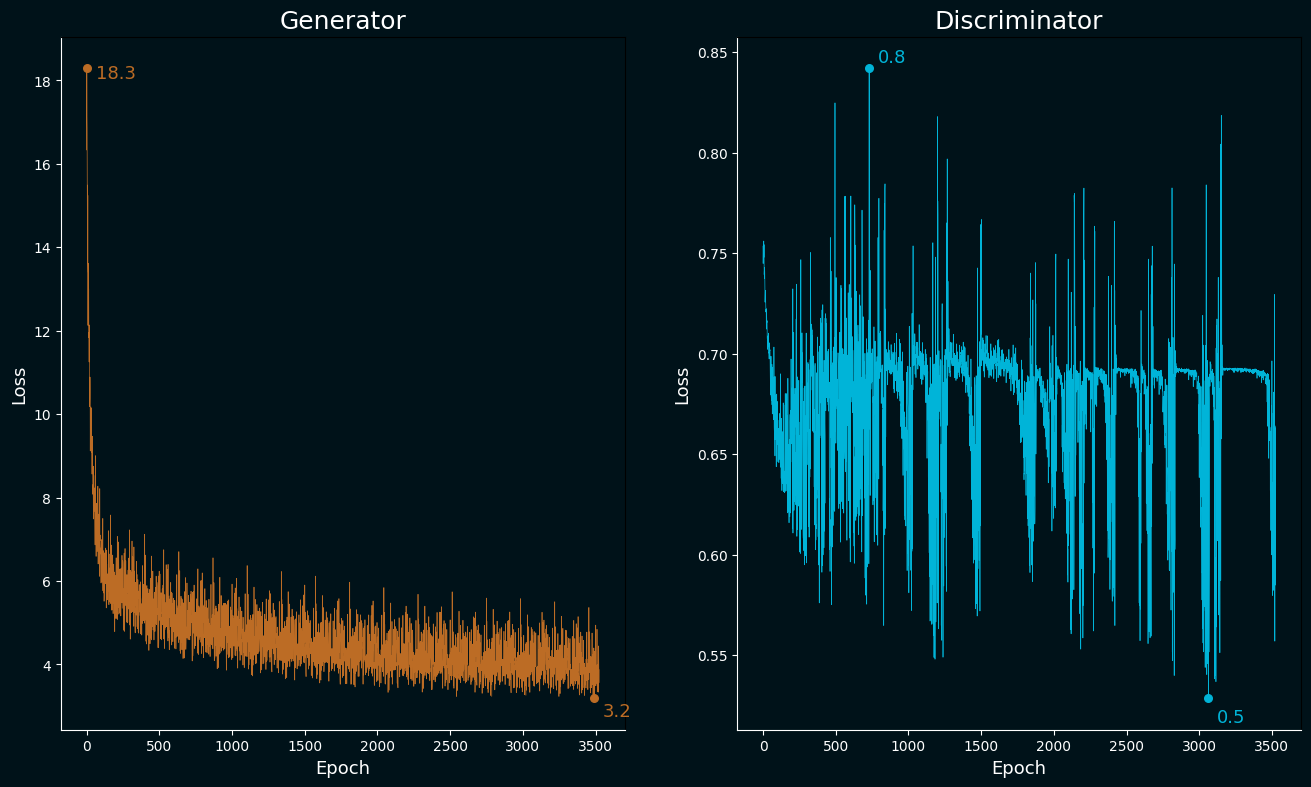

In [25]:
from matplotlib.font_manager import FontProperties

background_color = '#001219'
font = FontProperties()        # fname='LexendDeca-VariableFont_wght.ttf'
fig, ax = plt.subplots(1, 2, figsize=(16, 9))
fig.set_facecolor(background_color)
ax[0].set_facecolor(background_color)
ax[1].set_facecolor(background_color)

ax[0].plot(range(len(all_loss_G)), all_loss_G, color='#bc6c25', lw=0.5) 
ax[1].plot(range(len(all_loss_D)), all_loss_D, color='#00b4d8', lw=0.5)

ax[0].scatter(
      [np.array(all_loss_G).argmax(), np.array(all_loss_G).argmin()],
      [np.array(all_loss_G).max(), np.array(all_loss_G).min()],
      s=30, color='#bc6c25',
   )
ax[1].scatter(
      [np.array(all_loss_D).argmax(), np.array(all_loss_D).argmin()],
      [np.array(all_loss_D).max(), np.array(all_loss_D).min()],
      s=30, color='#00b4d8',
   )

ax_text(
      np.array(all_loss_G).argmax()+60, np.array(all_loss_G).max()+0.1,
      f'{round(np.array(all_loss_G).max(),1)}',
      fontsize=13, color='#bc6c25',
      font=font,
      ax=ax[0]
   )
ax_text(
      np.array(all_loss_G).argmin()+60, np.array(all_loss_G).min()-0.1,
      f'{round(np.array(all_loss_G).min(),1)}',
      fontsize=13, color='#bc6c25',
      font=font,
      ax=ax[0]
   )

ax_text(
      np.array(all_loss_D).argmax()+60, np.array(all_loss_D).max()+0.01,
      f'{round(np.array(all_loss_D).max(),1)}',
      fontsize=13, color='#00b4d8',
      font=font,
      ax=ax[1]
   )
ax_text(
      np.array(all_loss_D).argmin()+60, np.array(all_loss_D).min()-0.005,
      f'{round(np.array(all_loss_D).min(),1)}',
      fontsize=13, color='#00b4d8',
      font=font,
      ax=ax[1]
   )
for i in range(2):
    ax[i].tick_params(axis='x', colors='white')
    ax[i].tick_params(axis='y', colors='white')
    ax[i].spines['left'].set_color('white') 
    ax[i].spines['bottom'].set_color('white') 
    ax[i].set_xlabel('Epoch', color='white', fontproperties=font, fontsize=13)
    ax[i].set_ylabel('Loss', color='white', fontproperties=font, fontsize=13)

ax[0].set_title('Generator', color='white', fontproperties=font, fontsize=18)
ax[1].set_title('Discriminator', color='white', fontproperties=font, fontsize=18)
plt.savefig('Loss.jpg')
plt.show()
# ax[0].set_axis_off()
# ax[1].set_axis_off()

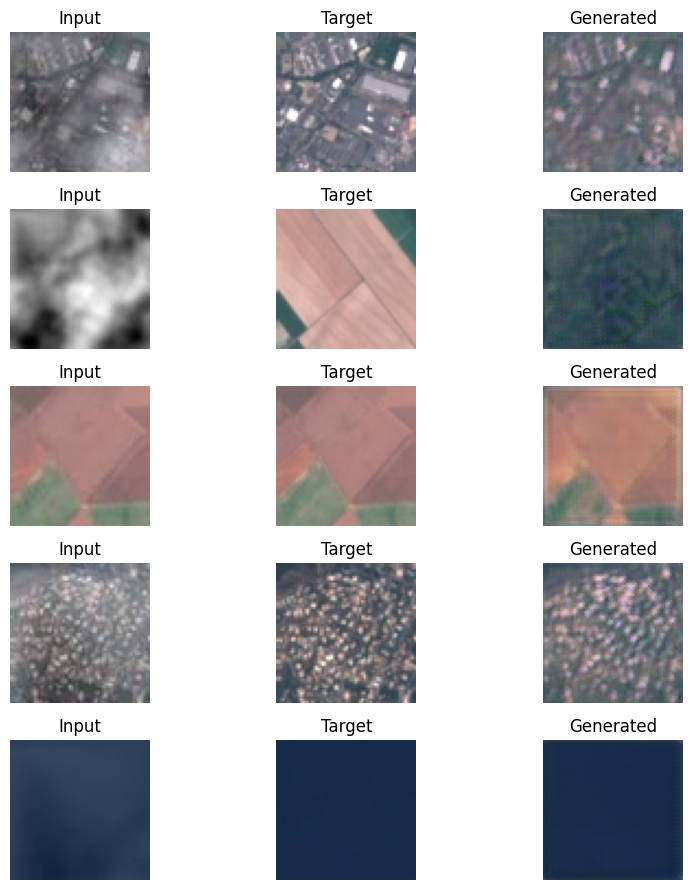

In [26]:
random.Random(2).shuffle(test_target_img_path)
random.Random(2).shuffle(test_input_img_paths)
subset_loader = dataset(batch_size=5, img_size=img_size, images_paths=test_input_img_paths,
                        targets=test_target_img_path)
generator = UNet()
generator.load_state_dict(torch.load('generator.pth'))

generator.eval()
for X, y in subset_loader:
    fig, axes = plt.subplots(5, 3, figsize=(9, 9))

    for i in range(5):
        axes[i, 0].imshow(np.transpose(X.numpy()[i], (1, 2, 0)))
        axes[i, 0].set_title("Input")
        axes[i, 0].axis('off')
        
        axes[i, 1].imshow(np.transpose(y.numpy()[i], (1, 2, 0)))
        axes[i, 1].set_title("Target")
        axes[i, 1].axis('off')
        
        generated_image = generator(X[i].unsqueeze(0)).detach().numpy()[0]
        axes[i, 2].imshow(np.transpose(generated_image, (1, 2, 0)))
        axes[i, 2].set_title("Generated")
        axes[i, 2].axis('off')
    
    # Adjust layout
    plt.tight_layout()
    plt.savefig('Test.jpg')
    plt.show()
    break 